In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib
import time

In [ ]:
data = pd.read_csv("thyroid_cancer_risk_data.csv")

In [108]:
data

Patient_ID  Age  Gender  ... Nodule_Size Thyroid_Cancer_Risk  Diagnosis
0                1   66    Male  ...        1.08                 Low     Benign
1                2   29    Male  ...        4.05                 Low     Benign
2                3   86    Male  ...        4.61                 Low     Benign
3                4   75  Female  ...        2.46              Medium     Benign
4                5   35  Female  ...        2.11                High     Benign
...            ...  ...     ...  ...         ...                 ...        ...
212686      212687   58  Female  ...        1.48                 Low     Benign
212687      212688   89    Male  ...        4.46              Medium     Benign
212688      212689   72  Female  ...        2.36              Medium     Benign
212689      212690   85  Female  ...        1.54              Medium     Benign
212690      212691   46  Female  ...        2.53                 Low  Malignant

[212691 rows x 17 columns]

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [110]:
data = data.drop('Patient_ID', axis=1)

In [111]:
data

Age  Gender  Country  ... Nodule_Size Thyroid_Cancer_Risk  Diagnosis
0        66    Male   Russia  ...        1.08                 Low     Benign
1        29    Male  Germany  ...        4.05                 Low     Benign
2        86    Male  Nigeria  ...        4.61                 Low     Benign
3        75  Female    India  ...        2.46              Medium     Benign
4        35  Female  Germany  ...        2.11                High     Benign
...     ...     ...      ...  ...         ...                 ...        ...
212686   58  Female    India  ...        1.48                 Low     Benign
212687   89    Male    Japan  ...        4.46              Medium     Benign
212688   72  Female  Nigeria  ...        2.36              Medium     Benign
212689   85  Female   Brazil  ...        1.54              Medium     Benign
212690   46  Female    Japan  ...        2.53                 Low  Malignant

[212691 rows x 16 columns]

In [112]:
data.isnull().sum()

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [113]:
data.dtypes

Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

In [114]:
data.columns

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [115]:
c_colums = data.select_dtypes(include=['object', 'category']).columns
print("Categorical colmuns: ")
print(c_colums)

Categorical colmuns: 
Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


In [116]:
mapping_map = {
  "Family_History": {"Yes": 0, "No": 1},
  "Radiation_Exposure": {"Yes": 0, "No": 1},
    "Iodine_Deficiency": {"Yes": 0, "No": 1},
    "Smoking": {"Yes": 0, "No": 1},
    "Obesity": {"Yes": 0, "No": 1},
    "Diabetes": {"Yes": 0, "No": 1},
    "Thyroid_Cancer_Risk": {"Low": 0, "Medium": 1, "High": 2},
    "Diagnosis": {"Benign": 0, "Malignant": 1}
}

In [117]:
for columns, mapping in mapping_map.items():
  if columns in data.columns:
    data[columns]=data[columns].map(mapping)

In [118]:
data.head()

Age  Gender  Country  ... Nodule_Size  Thyroid_Cancer_Risk  Diagnosis
0   66    Male   Russia  ...        1.08                    0          0
1   29    Male  Germany  ...        4.05                    0          0
2   86    Male  Nigeria  ...        4.61                    0          0
3   75  Female    India  ...        2.46                    1          0
4   35  Female  Germany  ...        2.11                    2          0

[5 rows x 16 columns]

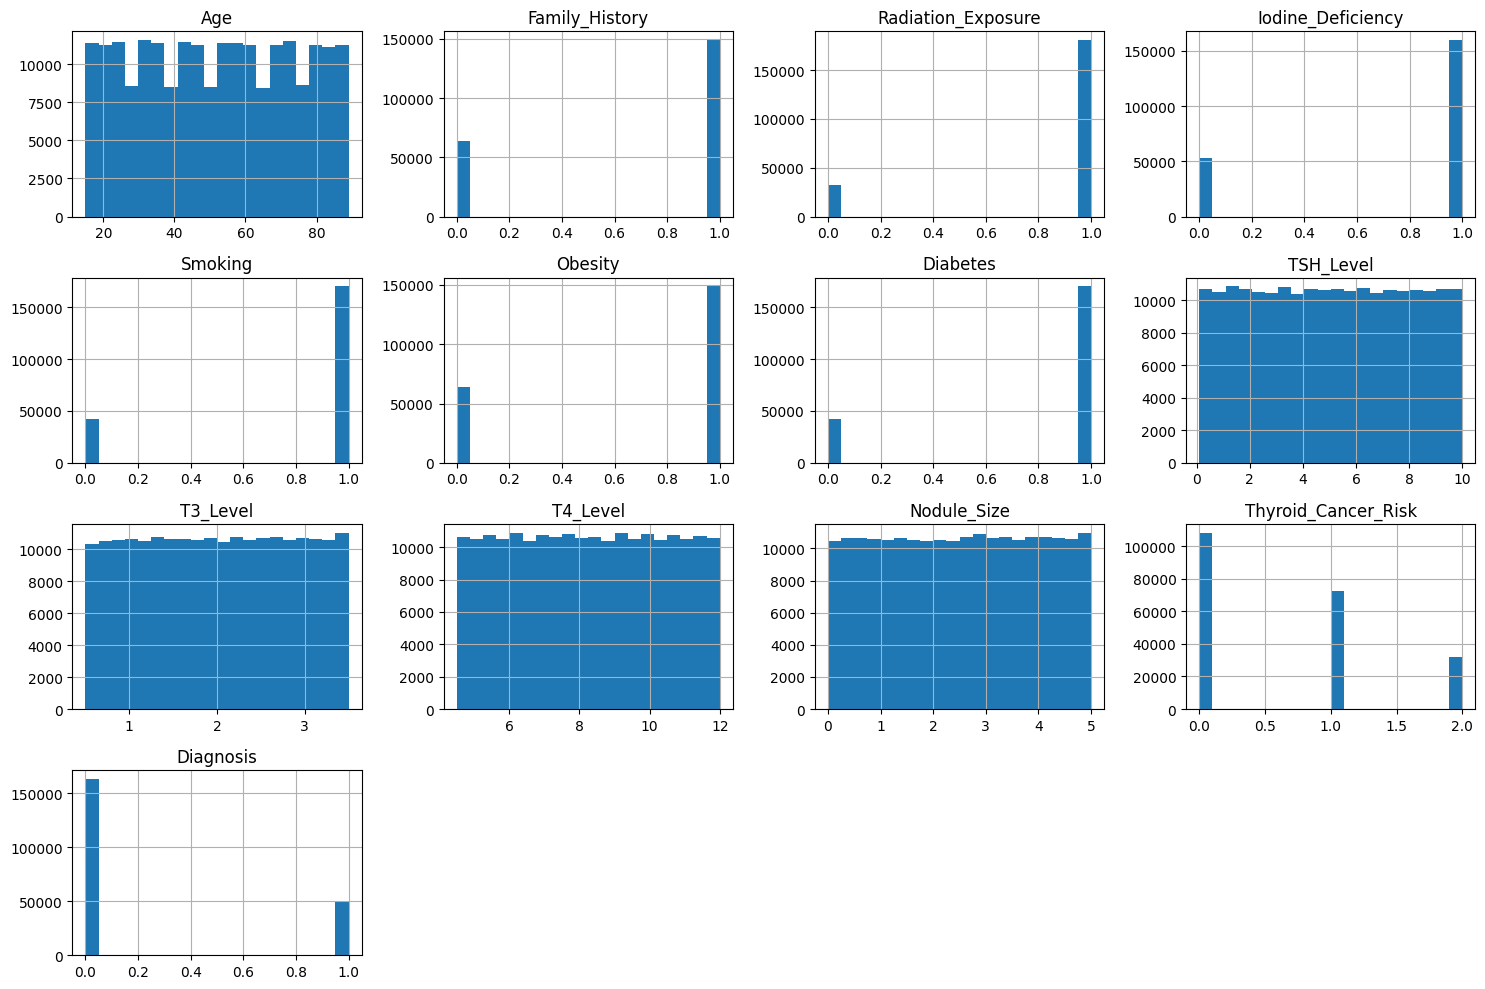

In [119]:
data.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

In [120]:
data_female = data[data["Gender"]=="Female"].copy()

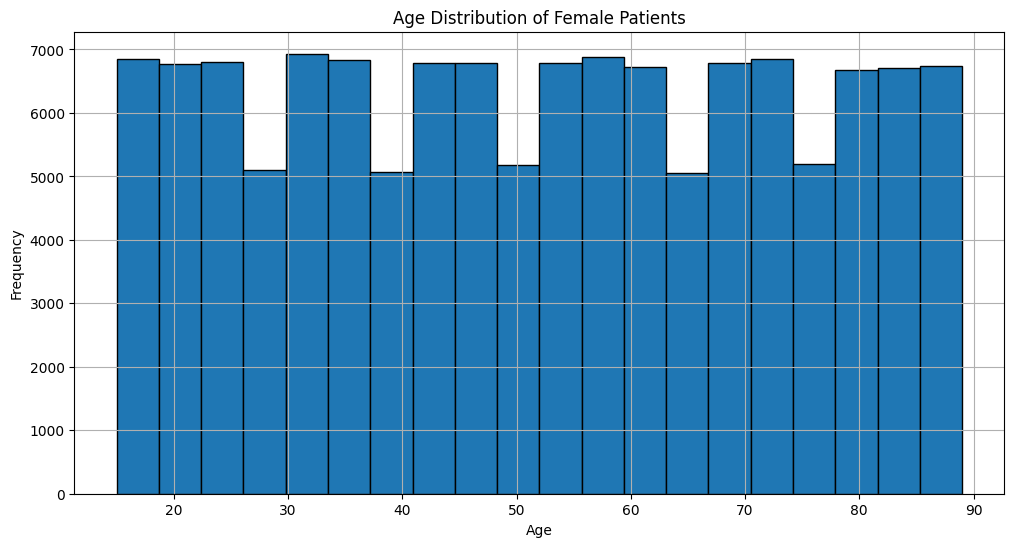

In [121]:
plt.figure(figsize=(12,6))
data_female["Age"].hist(bins=20, edgecolor = "black")
plt.title("Age Distribution of Female Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

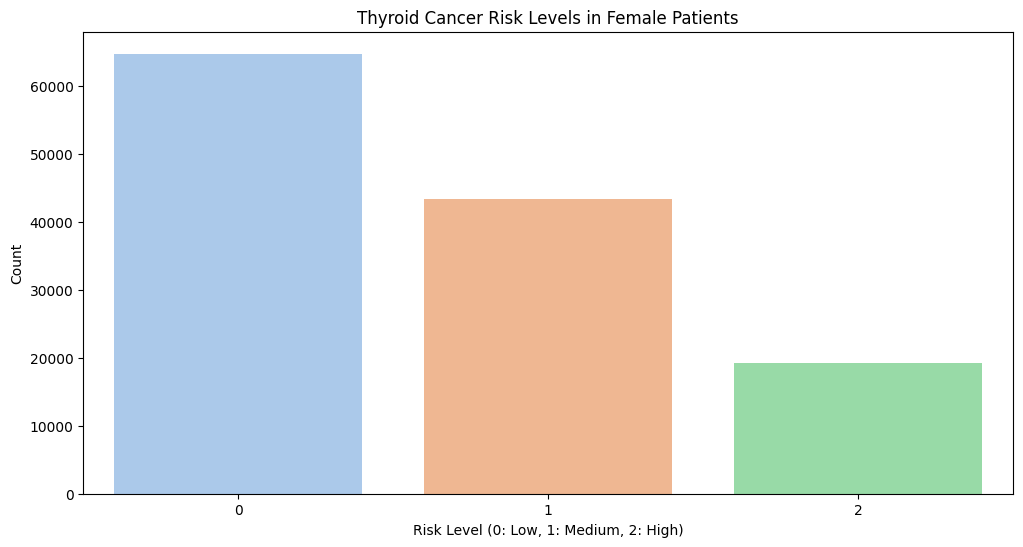

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_female , x = "Thyroid_Cancer_Risk", palette = "pastel")
plt.title("Thyroid Cancer Risk Levels in Female Patients")
plt.xlabel("Risk Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()

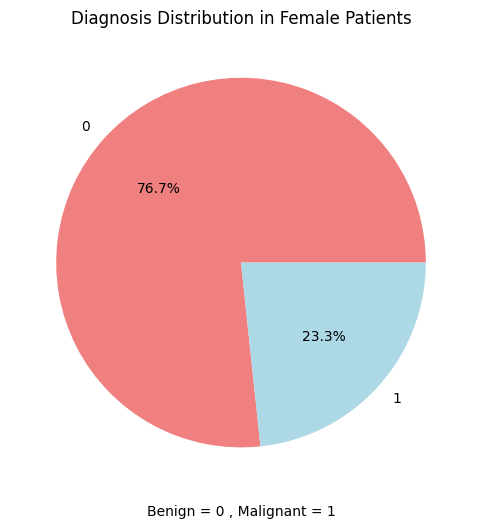

In [123]:
plt.figure(figsize=(12,6))
data_female["Diagnosis"].value_counts().plot(kind="pie", autopct = "%1.1f%%", colors = ["lightcoral", "lightblue"])
plt.title("Diagnosis Distribution in Female Patients")
plt.xlabel("Benign = 0 , Malignant = 1")
plt.ylabel("")
plt.show()

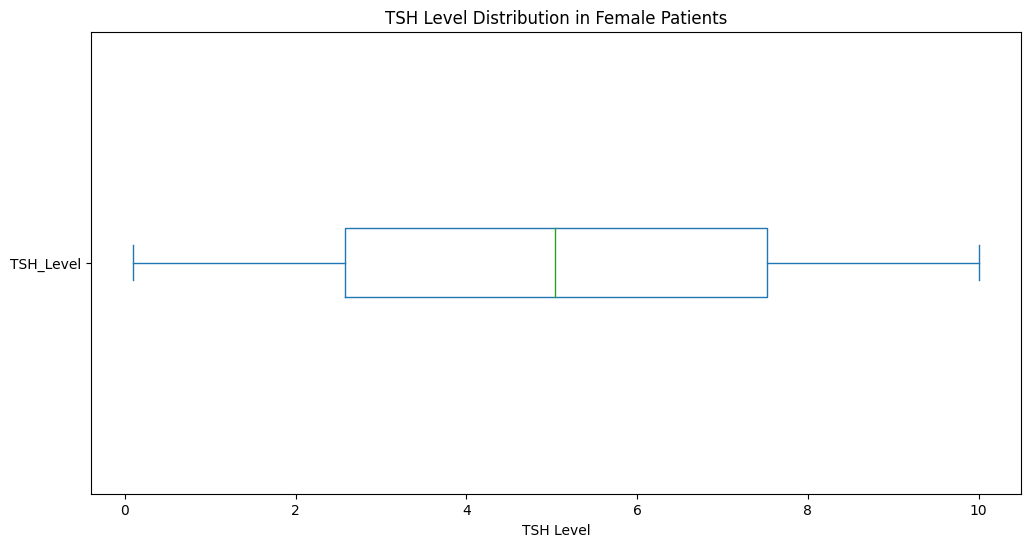

In [124]:
plt.figure(figsize=(12, 6))
data_female["TSH_Level"].plot(kind="box", vert=False)
plt.title("TSH Level Distribution in Female Patients")
plt.xlabel("TSH Level")
plt.show()

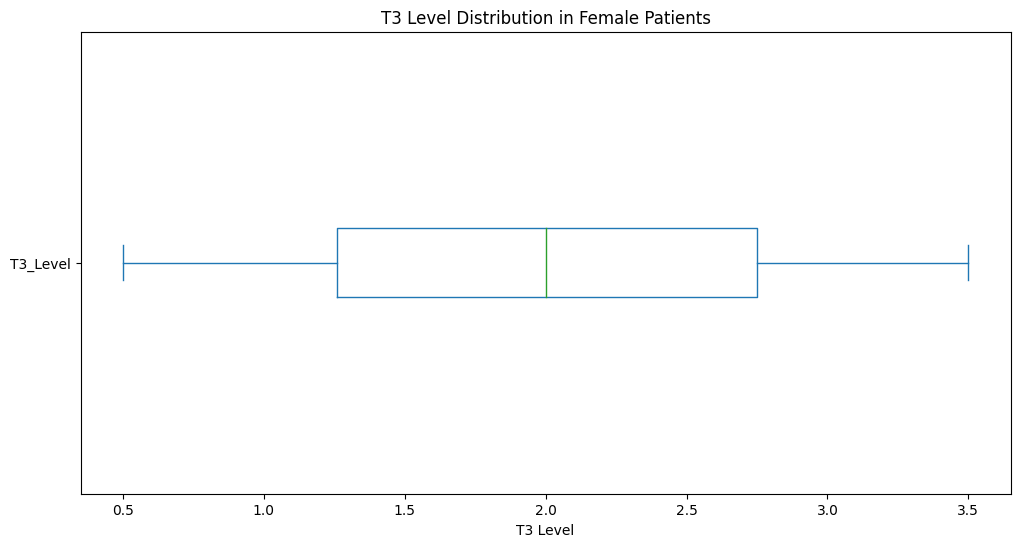

In [125]:
plt.figure(figsize=(12, 6))
data_female["T3_Level"].plot(kind="box", vert=False)
plt.title("T3 Level Distribution in Female Patients")
plt.xlabel("T3 Level")
plt.show()

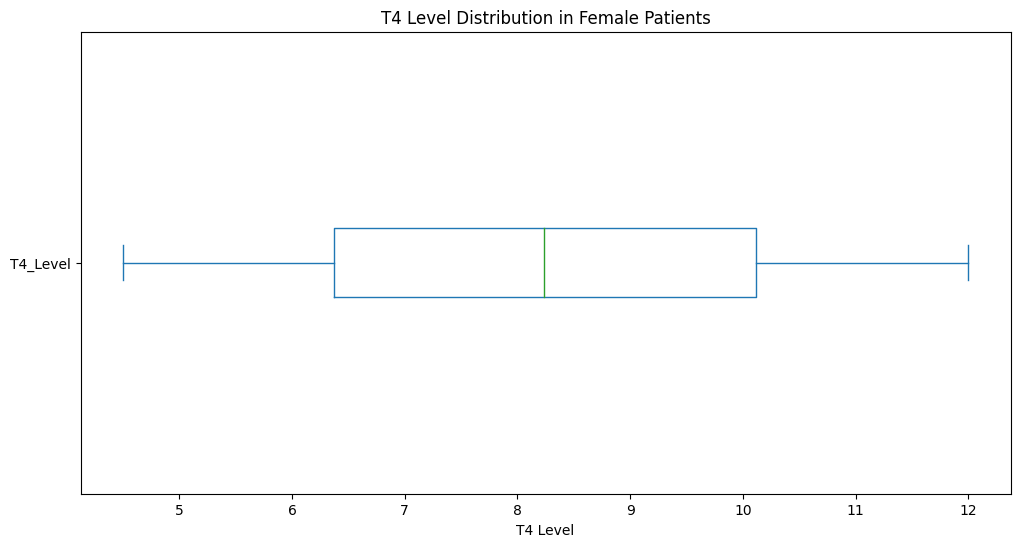

In [126]:
plt.figure(figsize=(12, 6))
data_female["T4_Level"].plot(kind="box", vert=False)
plt.title("T4 Level Distribution in Female Patients")
plt.xlabel("T4 Level")
plt.show()

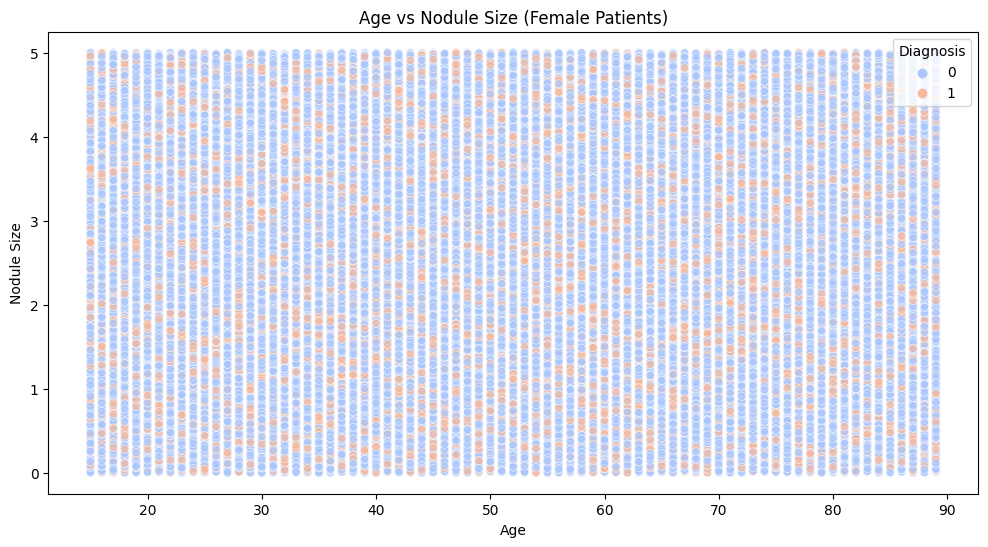

In [127]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_female, x="Age", y="Nodule_Size", hue="Diagnosis", palette="coolwarm", alpha=0.7)
plt.title("Age vs Nodule Size (Female Patients)")
plt.xlabel("Age")
plt.ylabel("Nodule Size")
plt.show()

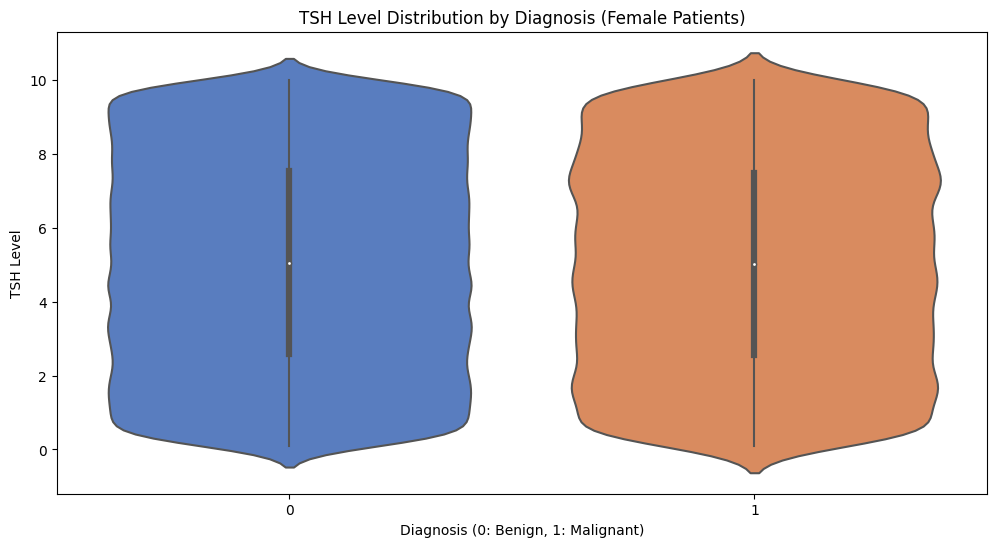

In [128]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_female, x="Diagnosis", y="TSH_Level", palette="muted")
plt.title("TSH Level Distribution by Diagnosis (Female Patients)")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("TSH Level")
plt.show()

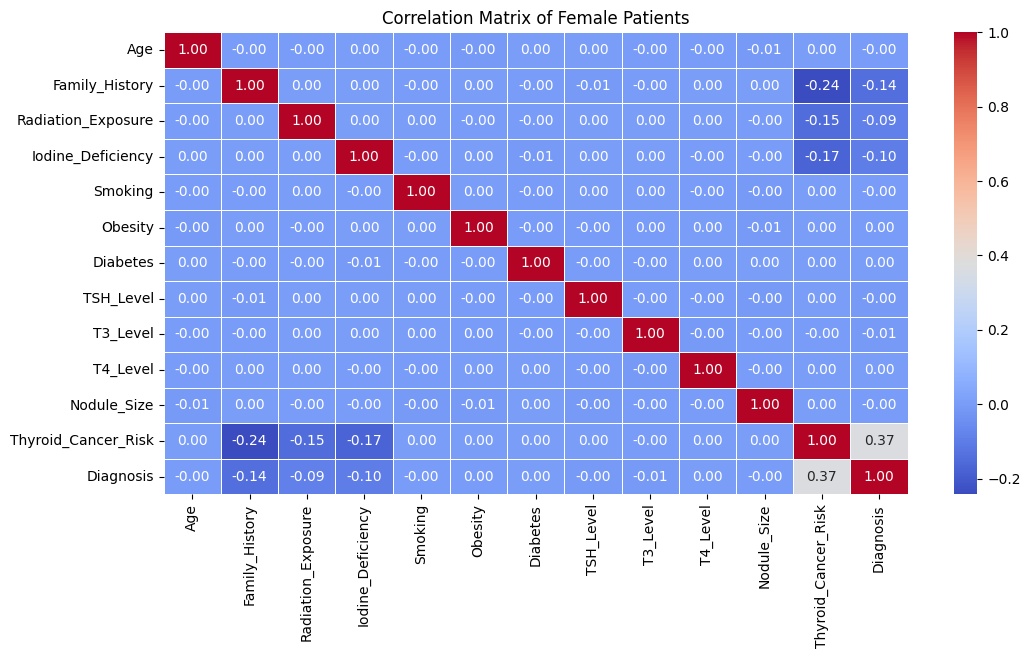

In [129]:
numeric_data = data_female.select_dtypes(include="number")


plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Female Patients")
plt.show()

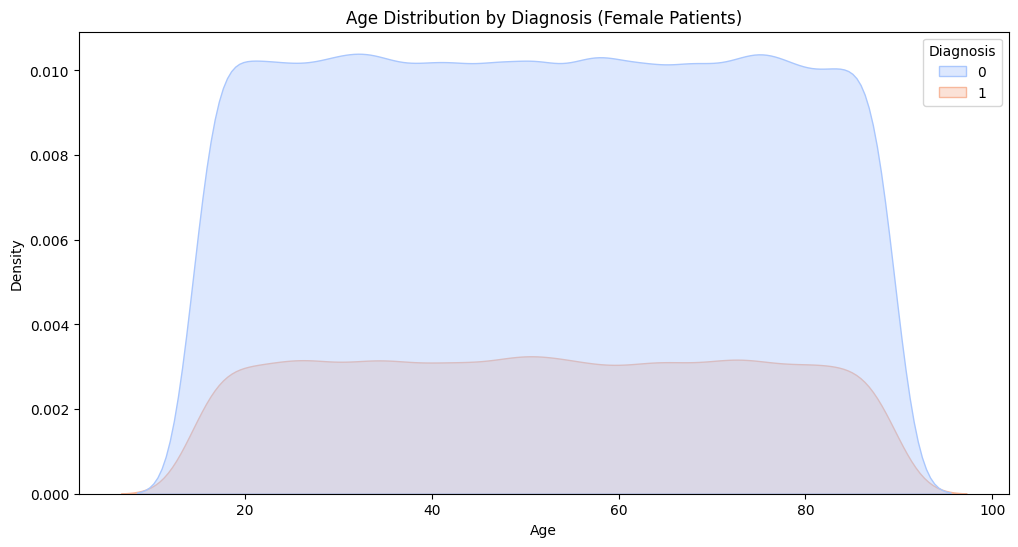

In [130]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_female, x="Age", hue="Diagnosis", fill=True, palette="coolwarm", alpha=0.4)
plt.title("Age Distribution by Diagnosis (Female Patients)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

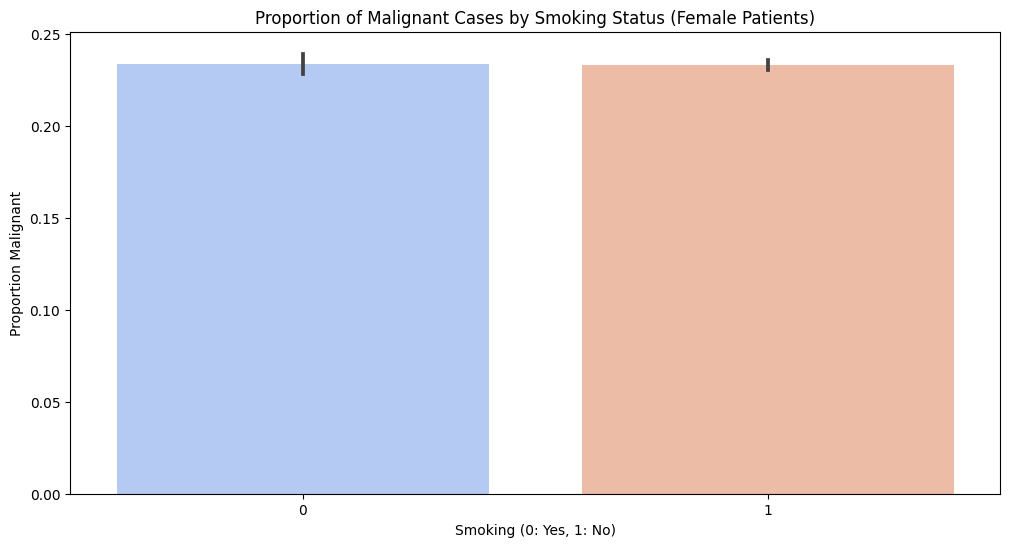

In [131]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_female, x="Smoking", y="Diagnosis", palette="coolwarm")
plt.title("Proportion of Malignant Cases by Smoking Status (Female Patients)")
plt.xlabel("Smoking (0: Yes, 1: No)")
plt.ylabel("Proportion Malignant")
plt.show()

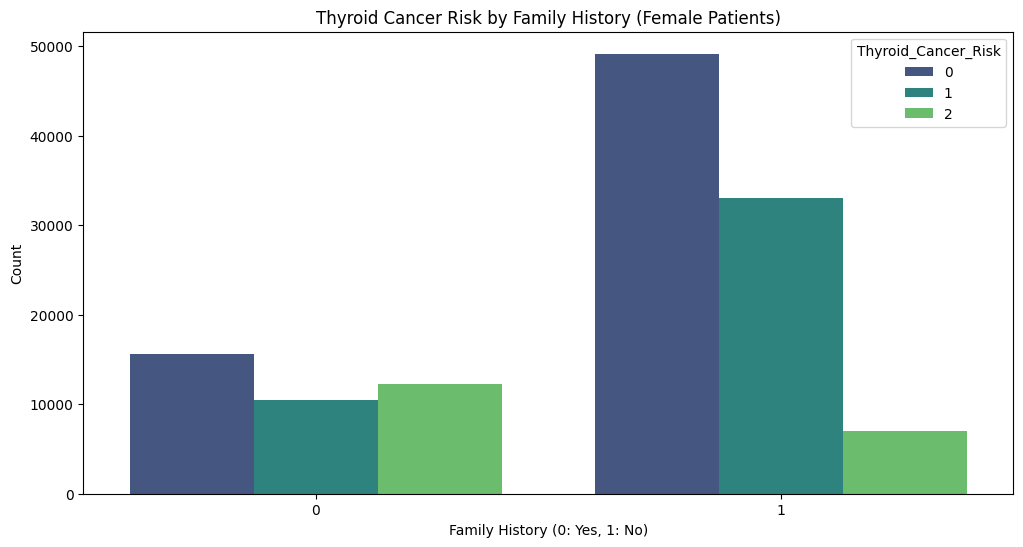

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_female, x="Family_History", hue="Thyroid_Cancer_Risk", palette="viridis")
plt.title("Thyroid Cancer Risk by Family History (Female Patients)")
plt.xlabel("Family History (0: Yes, 1: No)")
plt.ylabel("Count")
plt.show()

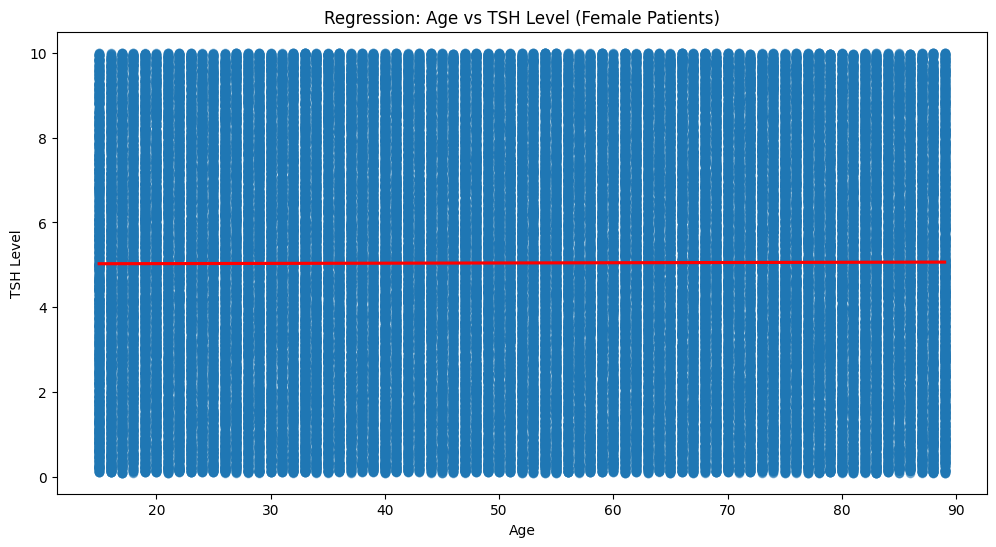

In [133]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data_female, x="Age", y="TSH_Level", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Regression: Age vs TSH Level (Female Patients)")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()

c:\Users\Lore\Documents\programming\python\Thyroid Cancer Risk\myenvi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  


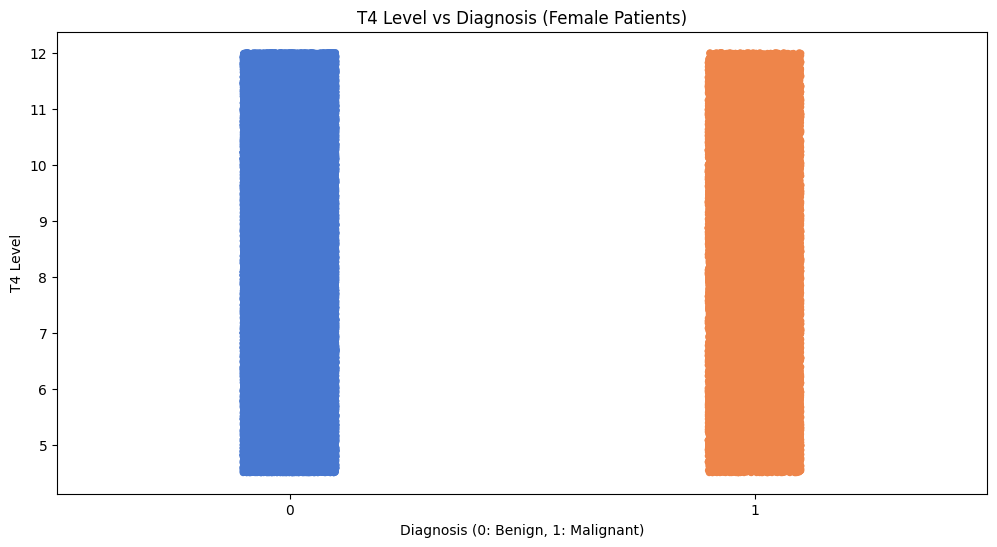

In [134]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=data_female, x="Diagnosis", y="T4_Level", jitter=True, palette="muted")
plt.title("T4 Level vs Diagnosis (Female Patients)")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("T4 Level")
plt.show()

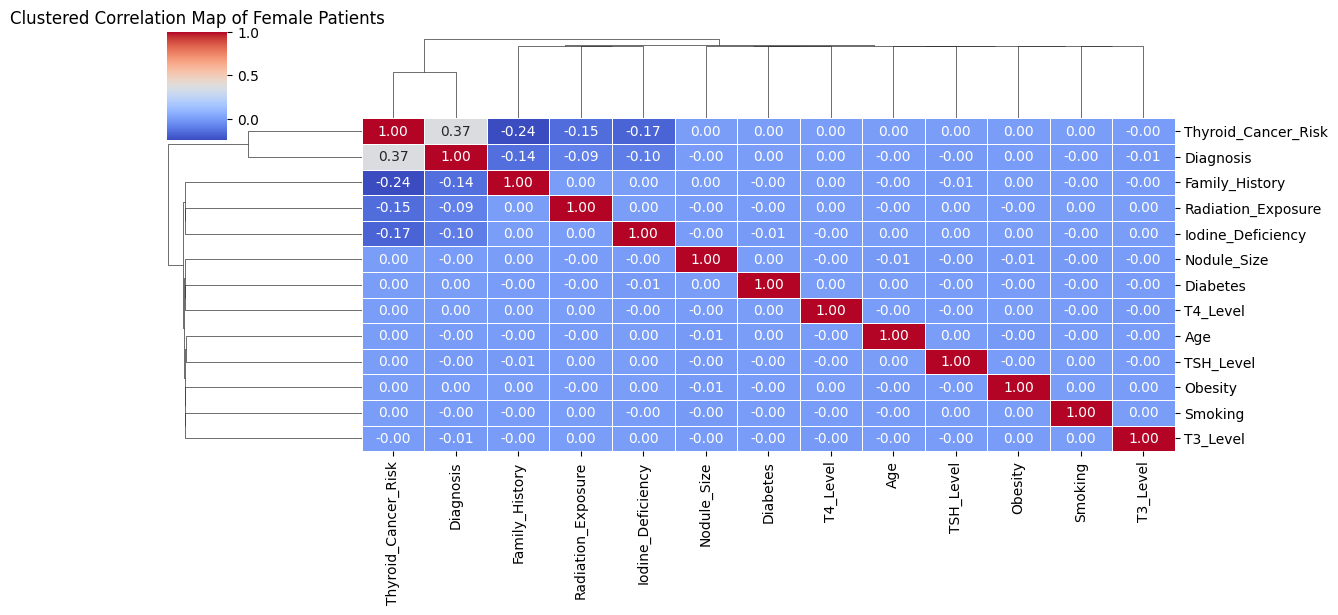

In [135]:
sns.clustermap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5, figsize=(12, 6),fmt=".2f")
plt.title("Clustered Correlation Map of Female Patients")
plt.show()

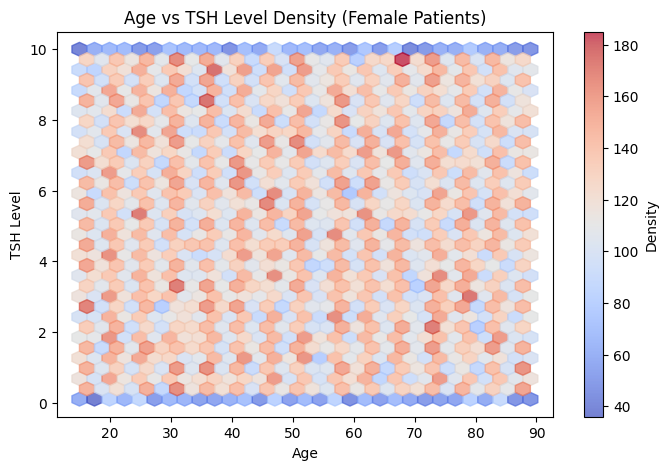

In [136]:
plt.figure(figsize=(8, 5))
plt.hexbin(data_female["Age"], data_female["TSH_Level"], gridsize=30, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Density")
plt.title("Age vs TSH Level Density (Female Patients)")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()

In [137]:
data_male = data[data["Gender"] == "Male"].copy()

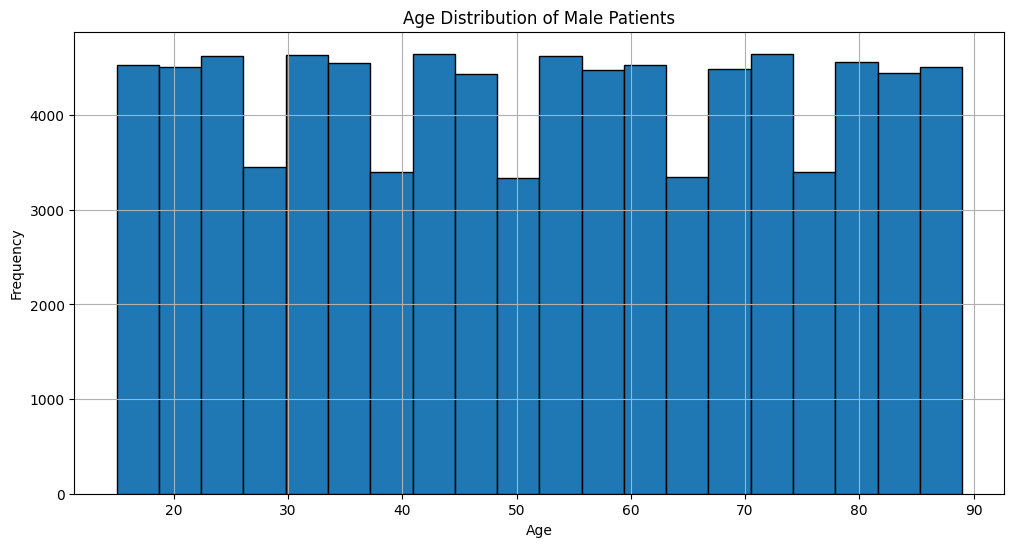

In [138]:
plt.figure(figsize=(12, 6))
data_male["Age"].hist(bins=20, edgecolor="black")
plt.title("Age Distribution of Male Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

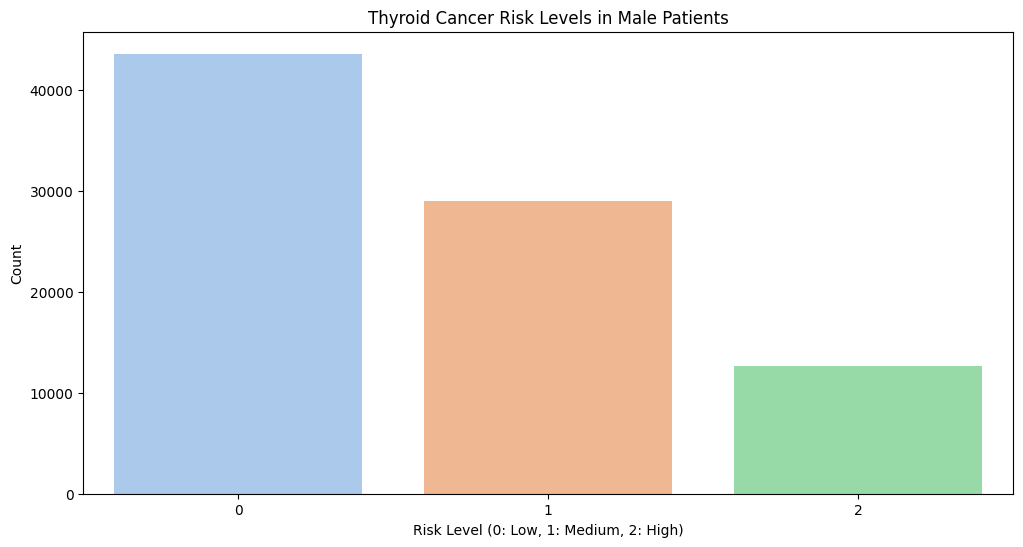

In [139]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_male, x="Thyroid_Cancer_Risk", palette="pastel")
plt.title("Thyroid Cancer Risk Levels in Male Patients")
plt.xlabel("Risk Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()

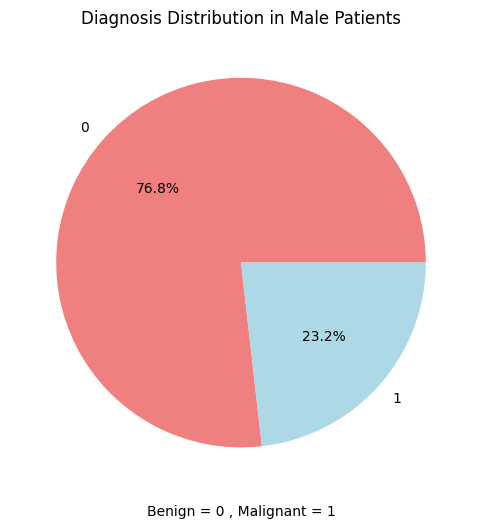

In [140]:
plt.figure(figsize=(12, 6))
data_male["Diagnosis"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue"])
plt.title("Diagnosis Distribution in Male Patients")
plt.xlabel("Benign = 0 , Malignant = 1")
plt.ylabel("")
plt.show()

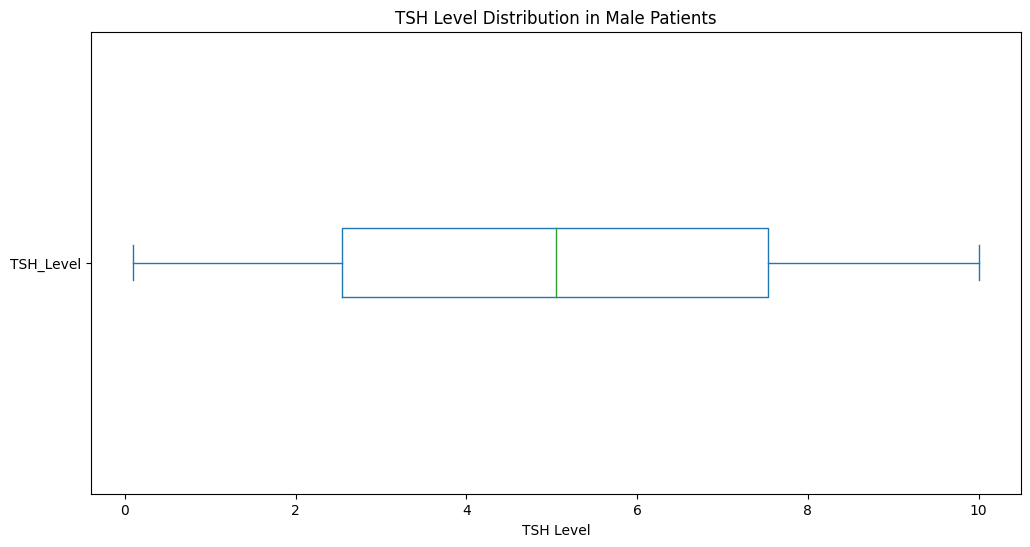

In [141]:
plt.figure(figsize=(12, 6))
data_male["TSH_Level"].plot(kind="box", vert=False)
plt.title("TSH Level Distribution in Male Patients")
plt.xlabel("TSH Level")
plt.show()

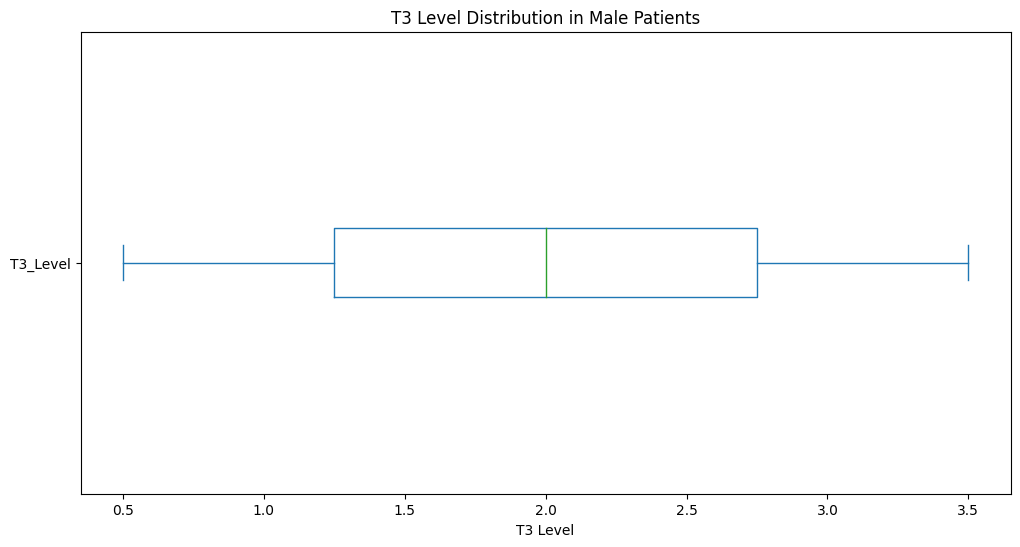

In [142]:
plt.figure(figsize=(12, 6))
data_male["T3_Level"].plot(kind="box", vert=False)
plt.title("T3 Level Distribution in Male Patients")
plt.xlabel("T3 Level")
plt.show()

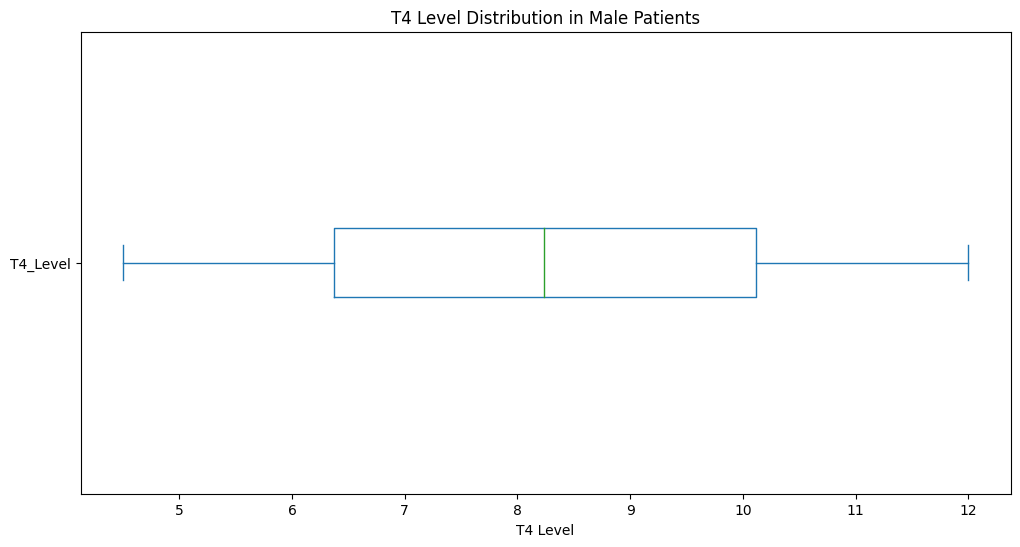

In [143]:
plt.figure(figsize=(12, 6))
data_male["T4_Level"].plot(kind="box", vert=False)
plt.title("T4 Level Distribution in Male Patients")
plt.xlabel("T4 Level")
plt.show()

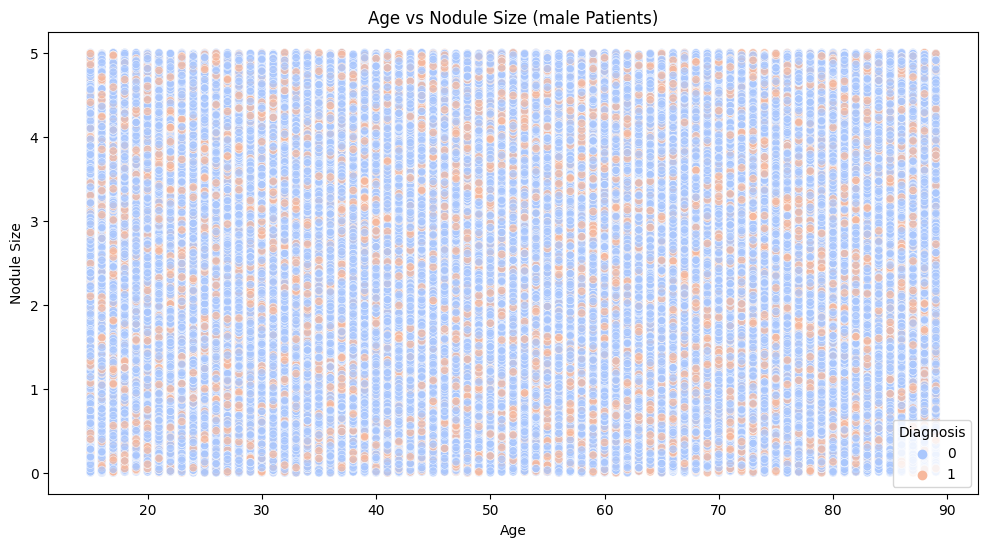

In [144]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_male, x="Age", y="Nodule_Size", hue="Diagnosis", palette="coolwarm", alpha=0.7)
plt.title("Age vs Nodule Size (male Patients)")
plt.xlabel("Age")
plt.ylabel("Nodule Size")
plt.show()

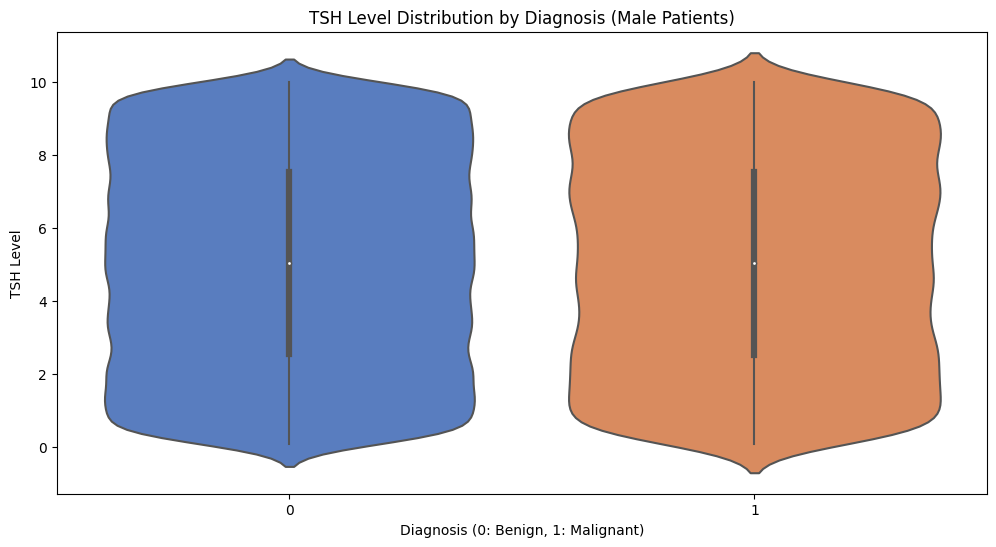

In [145]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_male, x="Diagnosis", y="TSH_Level", palette="muted")
plt.title("TSH Level Distribution by Diagnosis (Male Patients)")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("TSH Level")
plt.show()

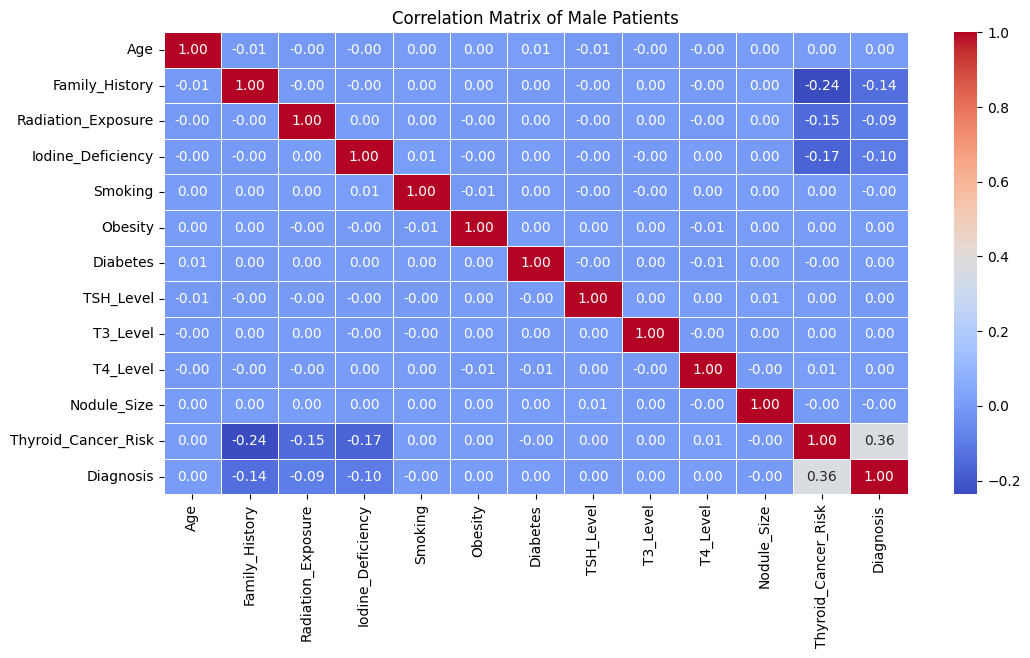

In [146]:
numeric_data_m = data_male.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data_m.corr(), annot=True, cmap="coolwarm", linewidths=0.5,fmt=".2f")
plt.title("Correlation Matrix of Male Patients")
plt.show()

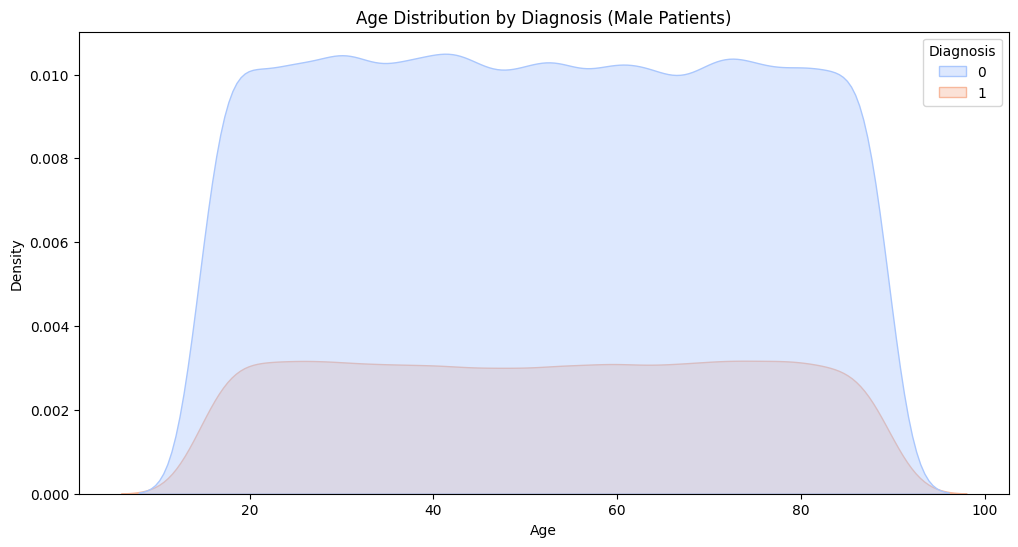

In [147]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_male, x="Age", hue="Diagnosis", fill=True, palette="coolwarm", alpha=0.4)
plt.title("Age Distribution by Diagnosis (Male Patients)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

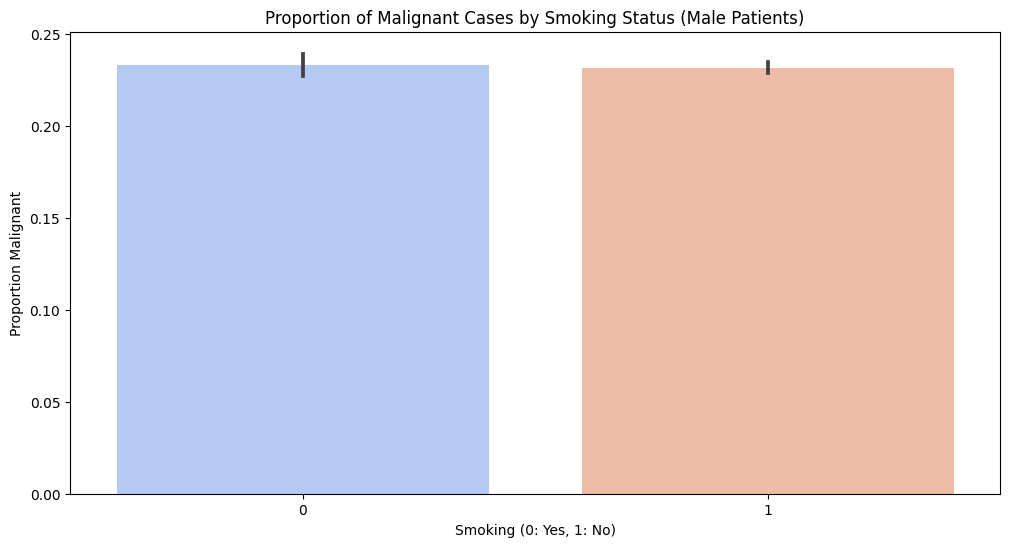

In [148]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_male, x="Smoking", y="Diagnosis", palette="coolwarm")
plt.title("Proportion of Malignant Cases by Smoking Status (Male Patients)")
plt.xlabel("Smoking (0: Yes, 1: No)")
plt.ylabel("Proportion Malignant")
plt.show()

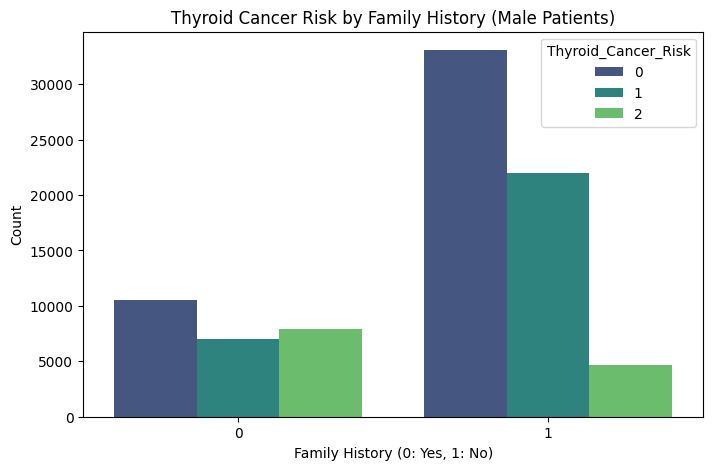

In [149]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_male, x="Family_History", hue="Thyroid_Cancer_Risk", palette="viridis")
plt.title("Thyroid Cancer Risk by Family History (Male Patients)")
plt.xlabel("Family History (0: Yes, 1: No)")
plt.ylabel("Count")
plt.show()

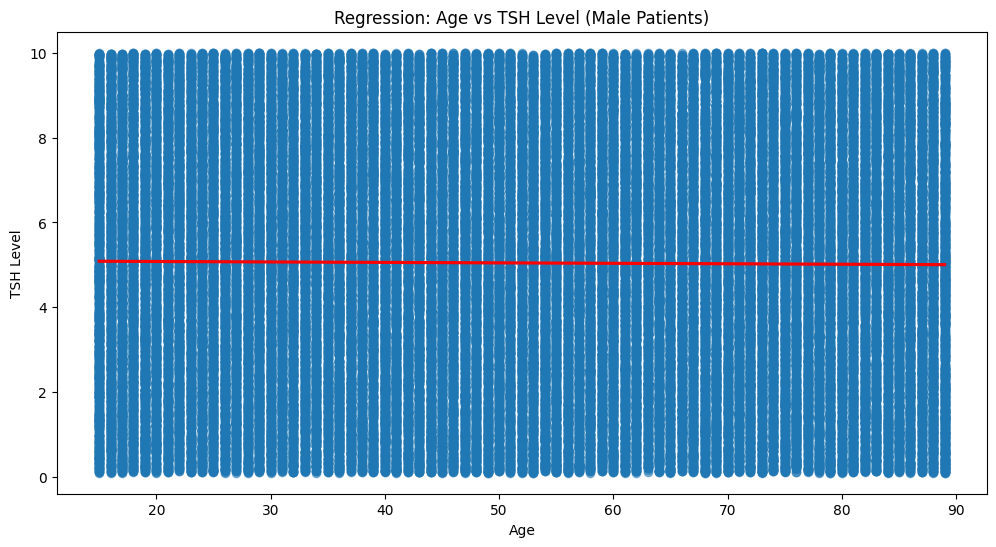

In [150]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data_male, x="Age", y="TSH_Level", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Regression: Age vs TSH Level (Male Patients)")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()


c:\Users\Lore\Documents\programming\python\Thyroid Cancer Risk\myenvi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  


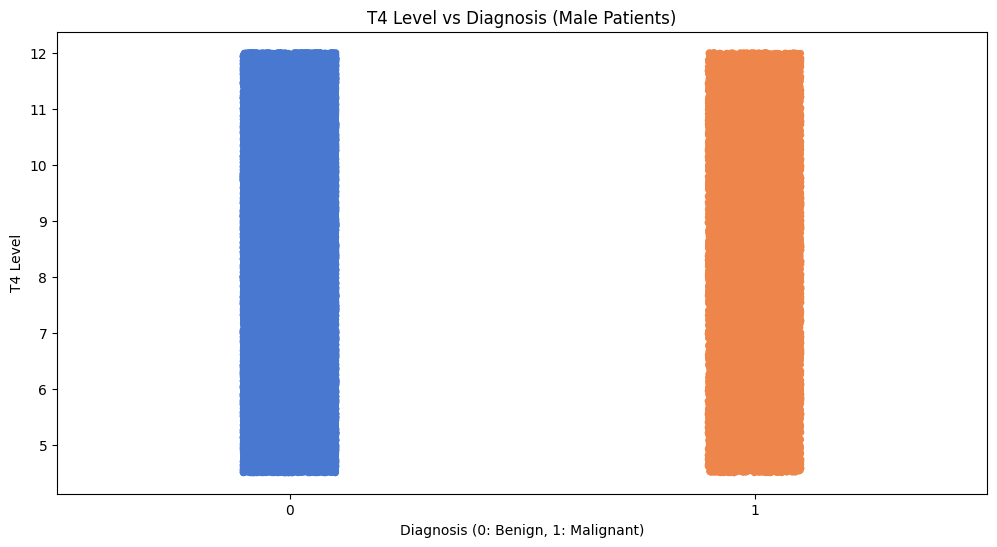

In [151]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=data_male, x="Diagnosis", y="T4_Level", jitter=True, palette="muted")
plt.title("T4 Level vs Diagnosis (Male Patients)")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("T4 Level")
plt.show()

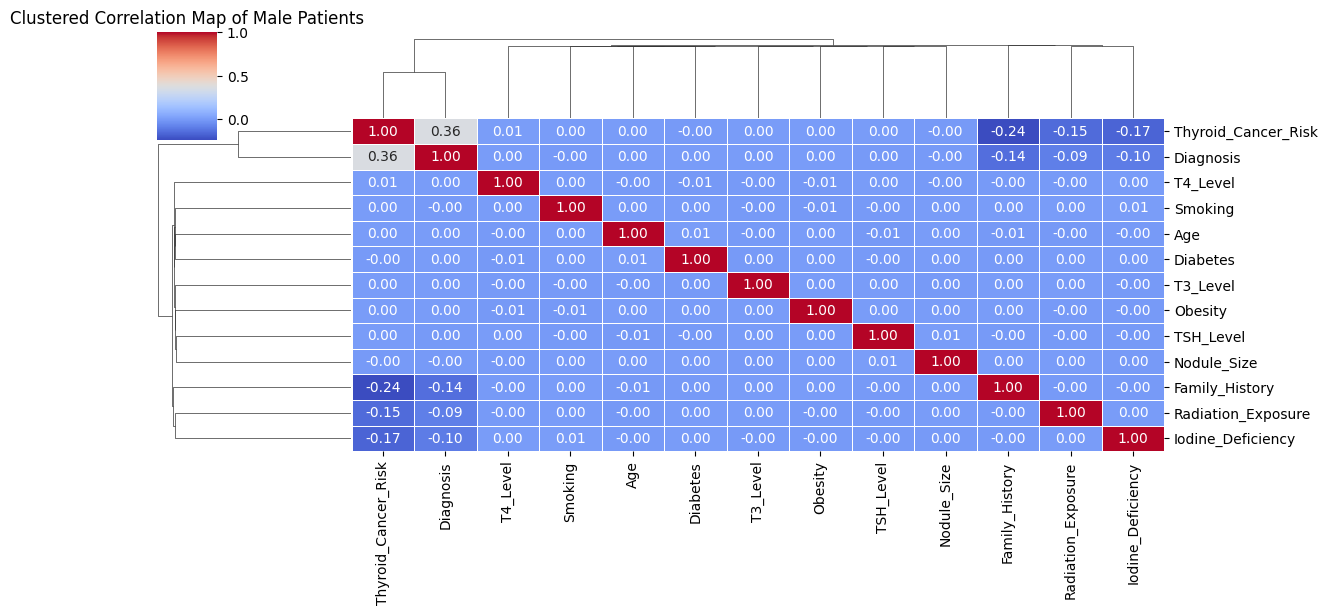

In [152]:
sns.clustermap(numeric_data_m.corr(), annot=True, cmap="coolwarm", linewidths=0.5, figsize=(12, 6),fmt=".2f")
plt.title("Clustered Correlation Map of Male Patients")
plt.show()

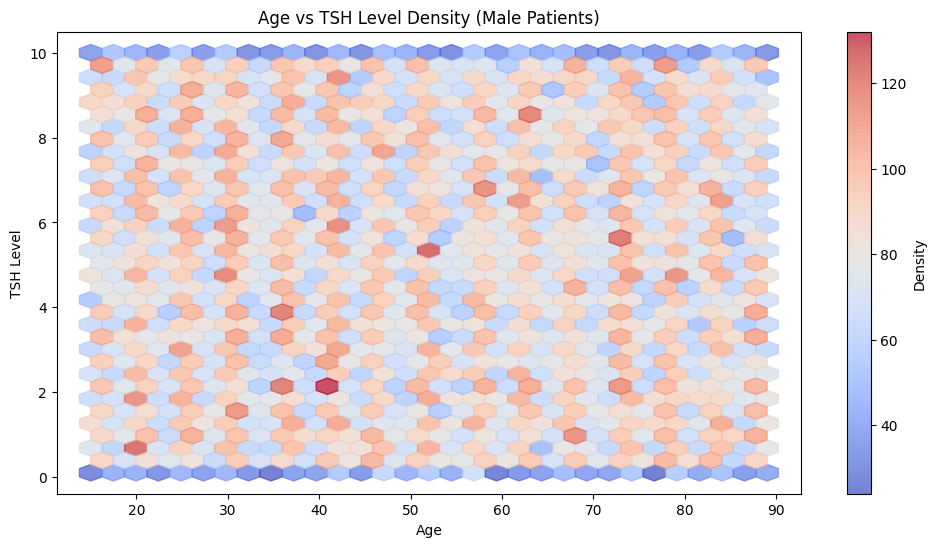

In [153]:
plt.figure(figsize=(12, 6))
plt.hexbin(data_male["Age"], data_male["TSH_Level"], gridsize=30, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Density")
plt.title("Age vs TSH Level Density (Male Patients)")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()

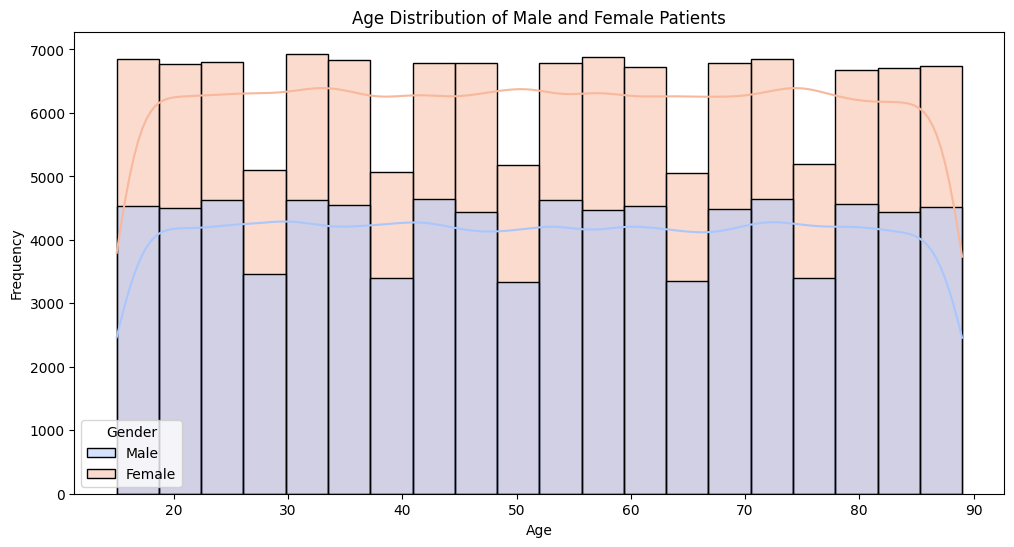

In [154]:
plt.figure(figsize=(12, 6))
sns.histplot(data, x="Age", hue="Gender", bins=20, kde=True, palette="coolwarm")
plt.title("Age Distribution of Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

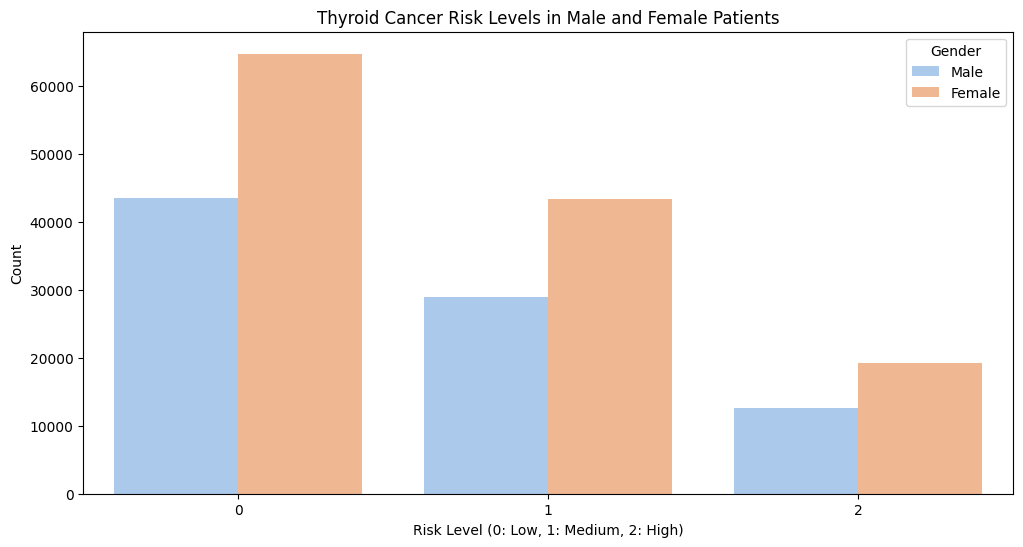

In [155]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Thyroid_Cancer_Risk", hue="Gender", palette="pastel")
plt.title("Thyroid Cancer Risk Levels in Male and Female Patients")
plt.xlabel("Risk Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()

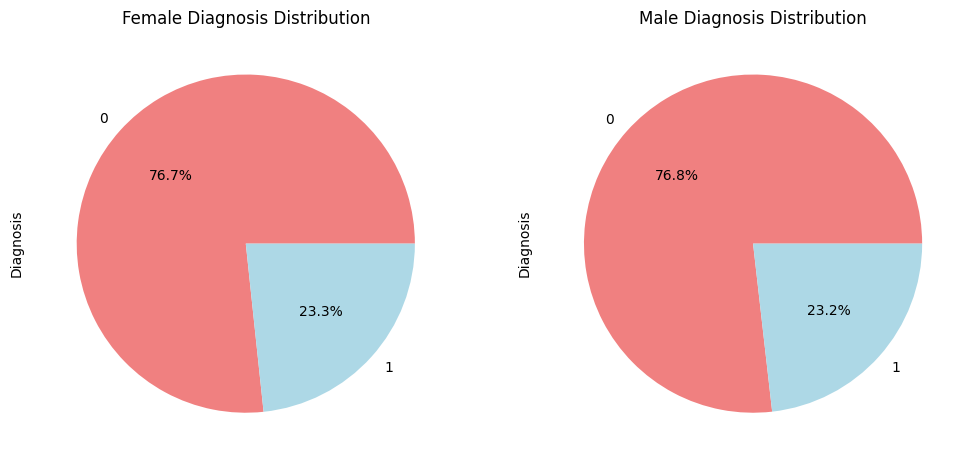

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data[data["Gender"] == "Female"]["Diagnosis"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue"], ax=ax[0], title="Female Diagnosis Distribution")
data[data["Gender"] == "Male"]["Diagnosis"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue"], ax=ax[1], title="Male Diagnosis Distribution")
plt.show()

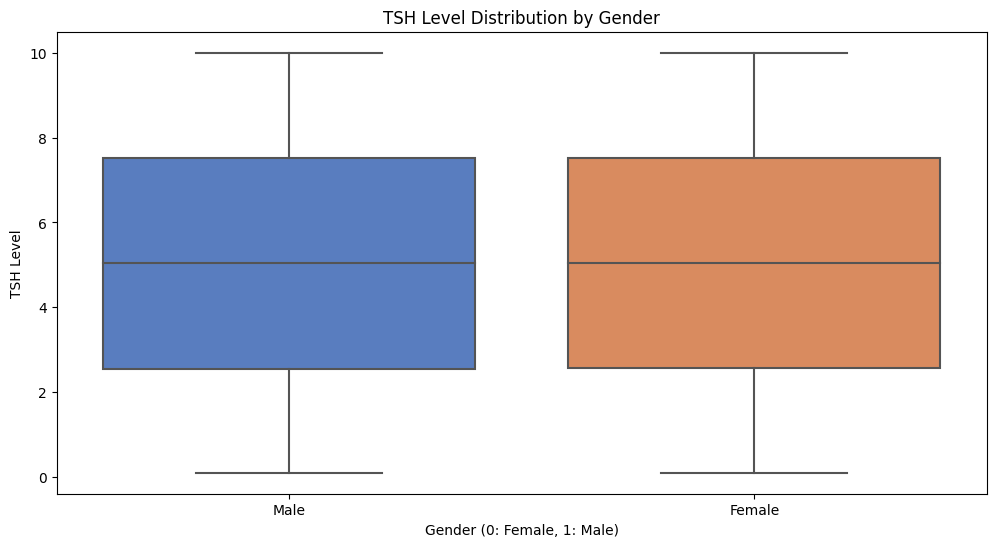

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Gender", y="TSH_Level", palette="muted")
plt.title("TSH Level Distribution by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("TSH Level")
plt.show()

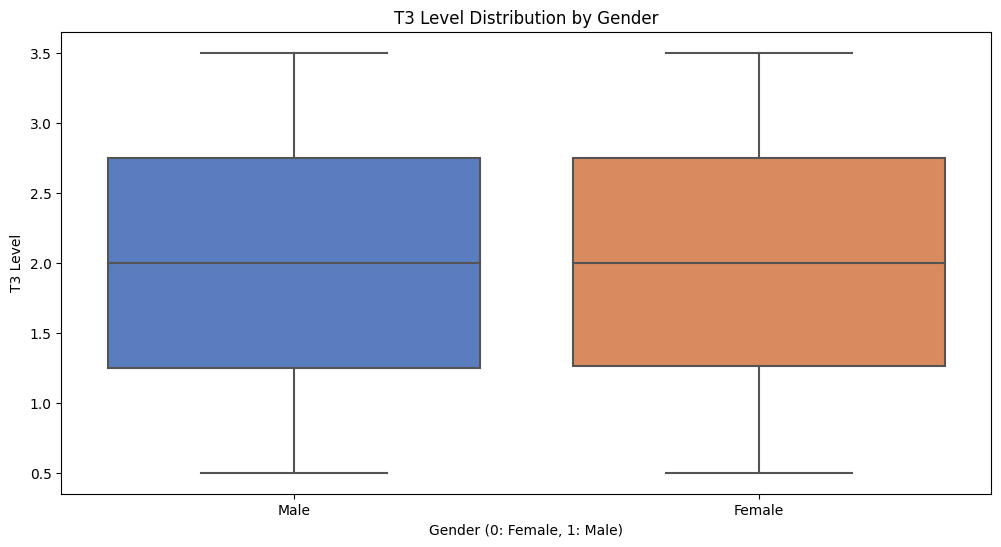

In [158]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Gender", y="T3_Level", palette="muted")
plt.title("T3 Level Distribution by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("T3 Level")
plt.show()

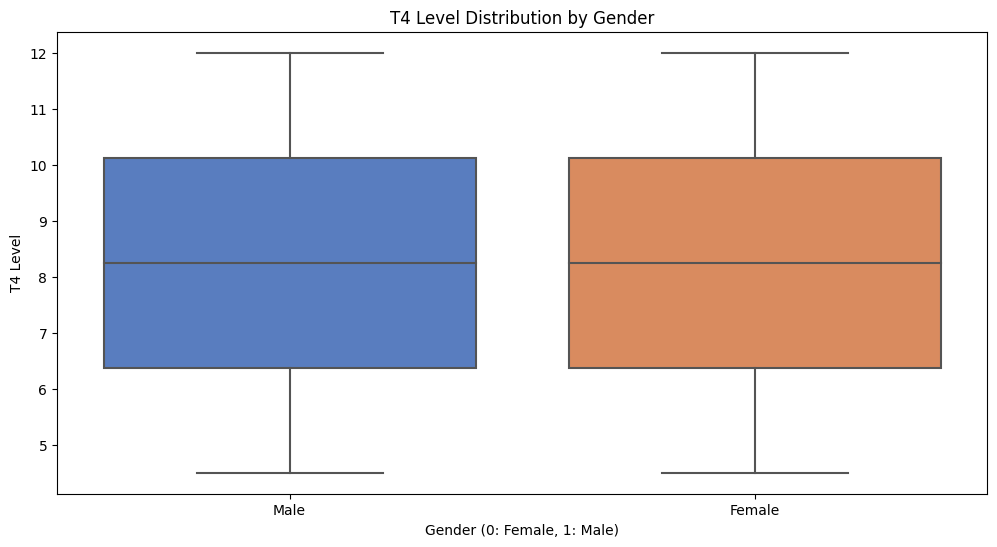

In [159]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Gender", y="T4_Level", palette="muted")
plt.title("T4 Level Distribution by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("T4 Level")
plt.show()

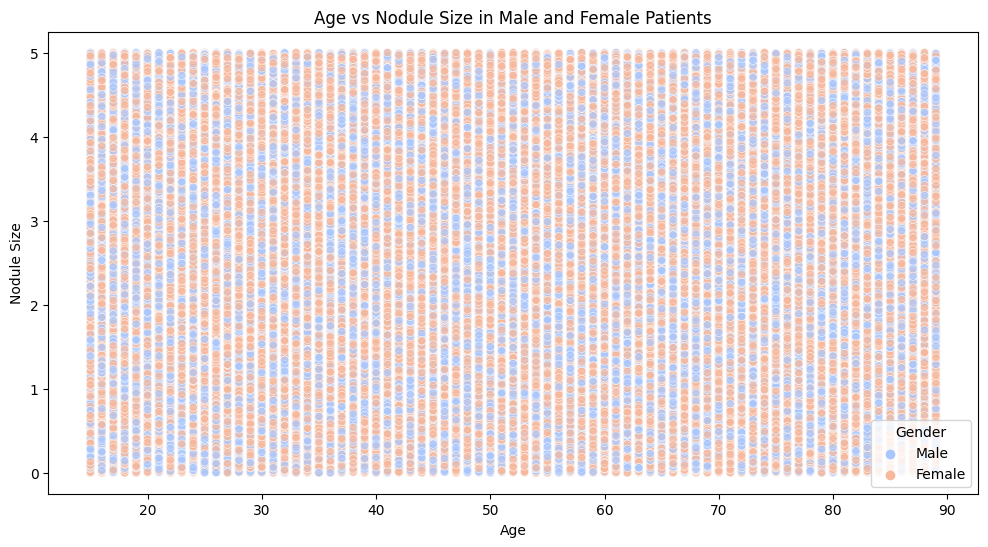

In [160]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="Age", y="Nodule_Size", hue="Gender", palette="coolwarm", alpha=0.7)
plt.title("Age vs Nodule Size in Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("Nodule Size")
plt.show()

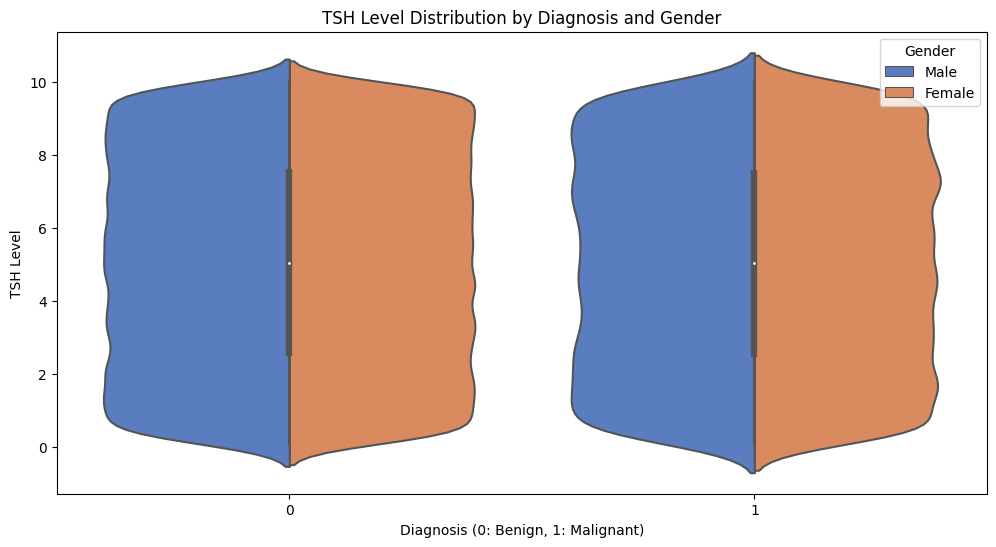

In [161]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="Diagnosis", y="TSH_Level", hue="Gender", split=True, palette="muted")
plt.title("TSH Level Distribution by Diagnosis and Gender")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("TSH Level")
plt.show()

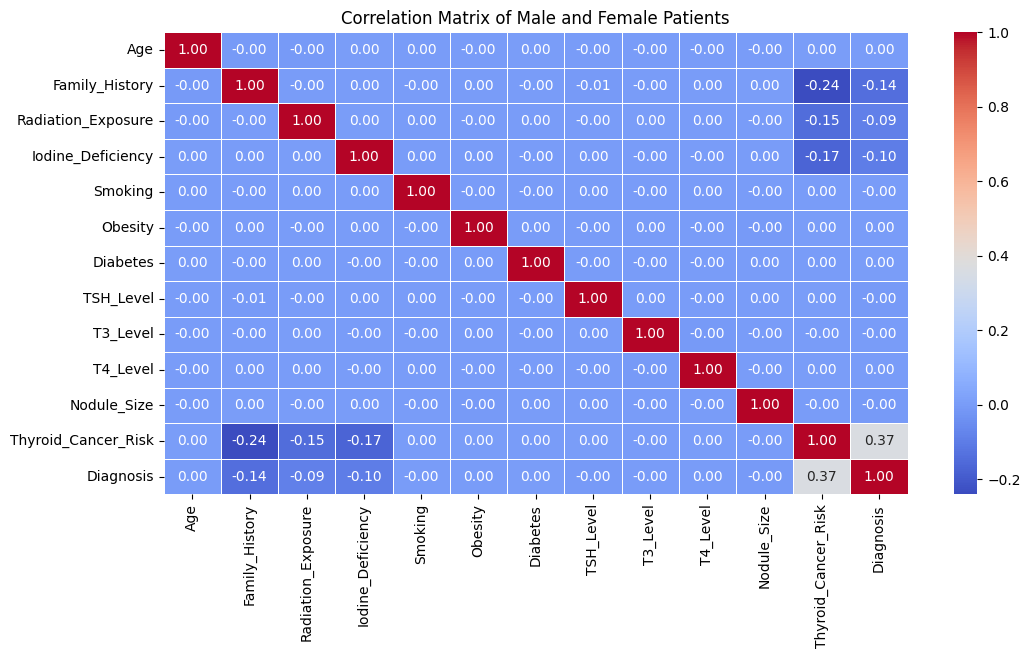

In [162]:
numeric_d = data.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_d.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Male and Female Patients")
plt.show()

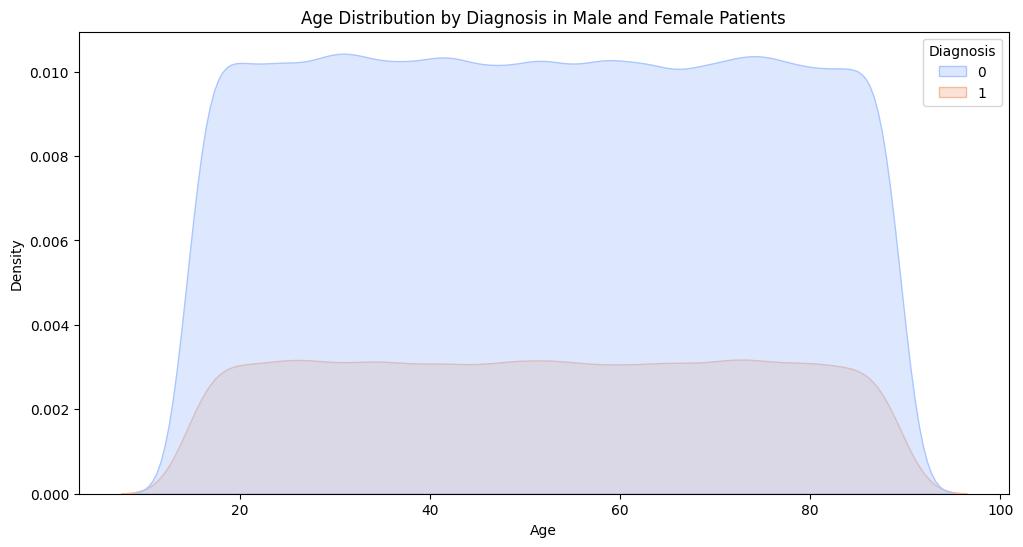

In [163]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x="Age", hue="Diagnosis", fill=True, palette="coolwarm", alpha=0.4)
plt.title("Age Distribution by Diagnosis in Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

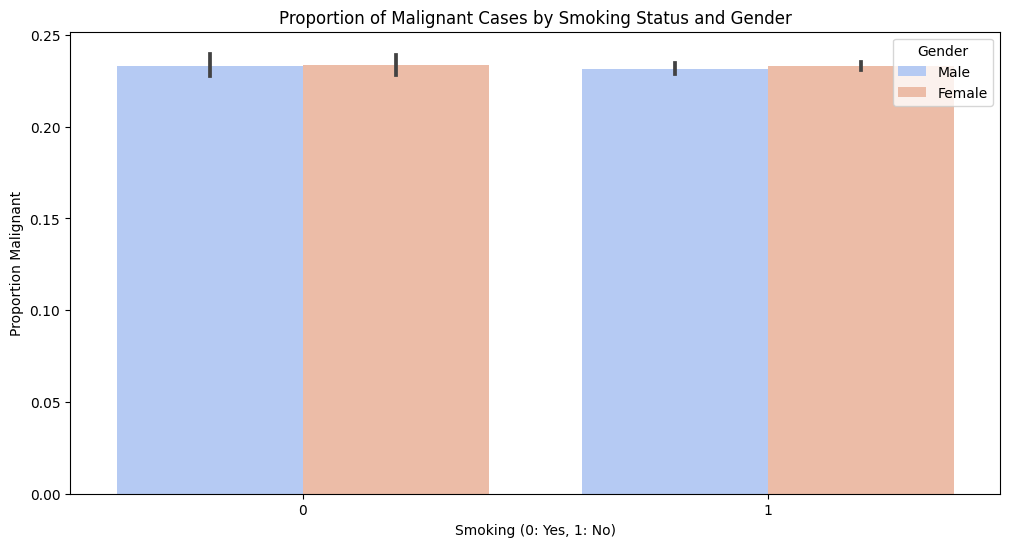

In [164]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Smoking", y="Diagnosis", hue="Gender", palette="coolwarm")
plt.title("Proportion of Malignant Cases by Smoking Status and Gender")
plt.xlabel("Smoking (0: Yes, 1: No)")
plt.ylabel("Proportion Malignant")
plt.show()

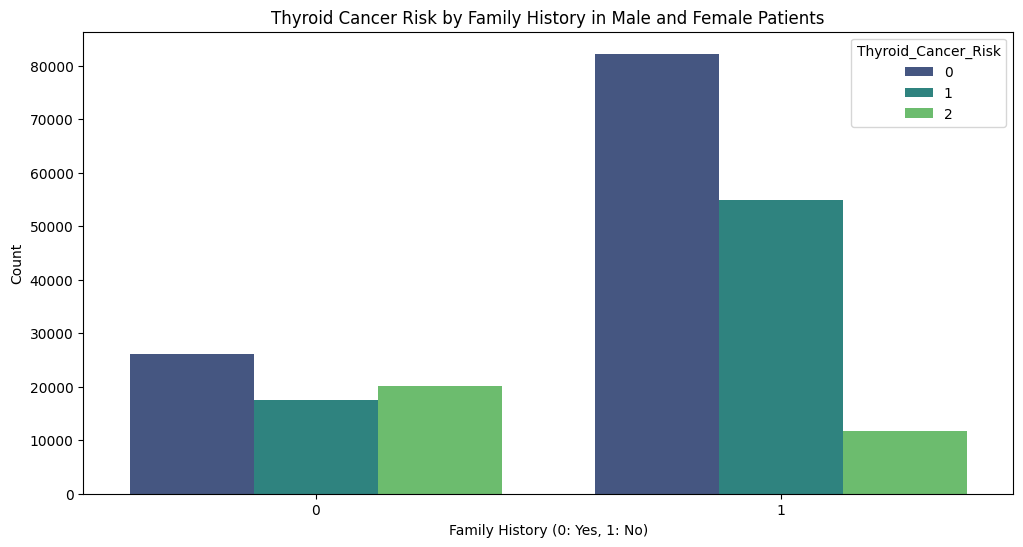

In [165]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Family_History", hue="Thyroid_Cancer_Risk", palette="viridis")
plt.title("Thyroid Cancer Risk by Family History in Male and Female Patients")
plt.xlabel("Family History (0: Yes, 1: No)")
plt.ylabel("Count")
plt.show()

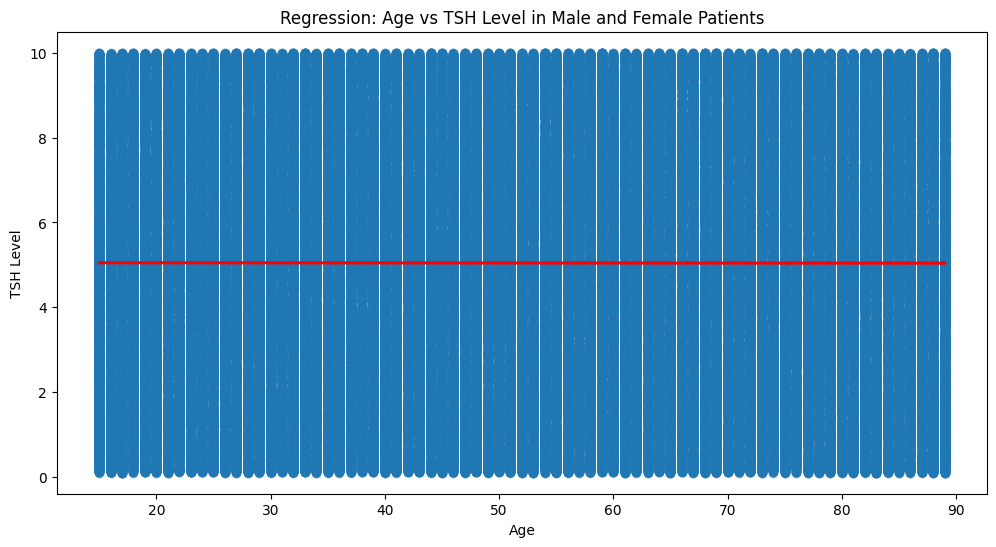

In [166]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x="Age", y="TSH_Level", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Regression: Age vs TSH Level in Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()

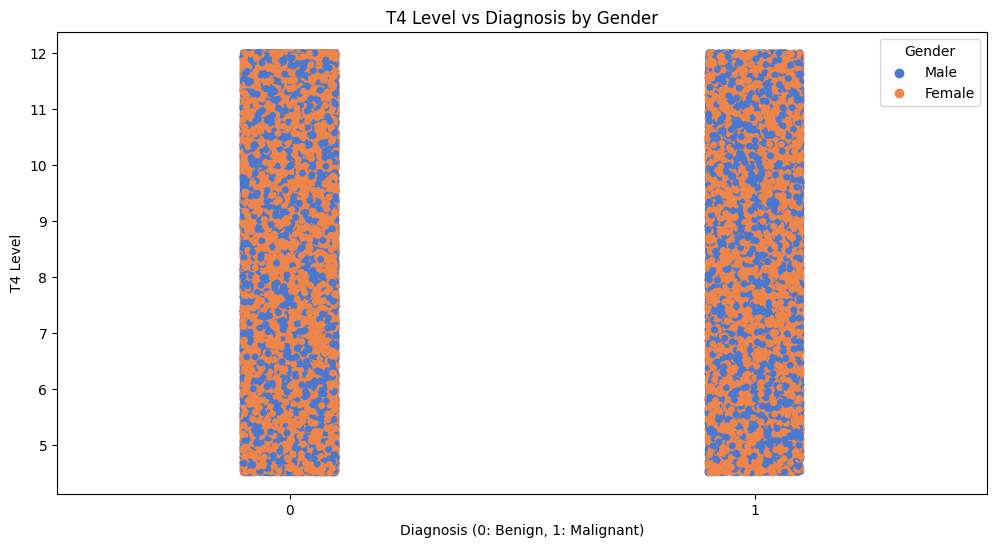

In [167]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=data, x="Diagnosis", y="T4_Level", hue="Gender", jitter=True, palette="muted")
plt.title("T4 Level vs Diagnosis by Gender")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("T4 Level")
plt.show()

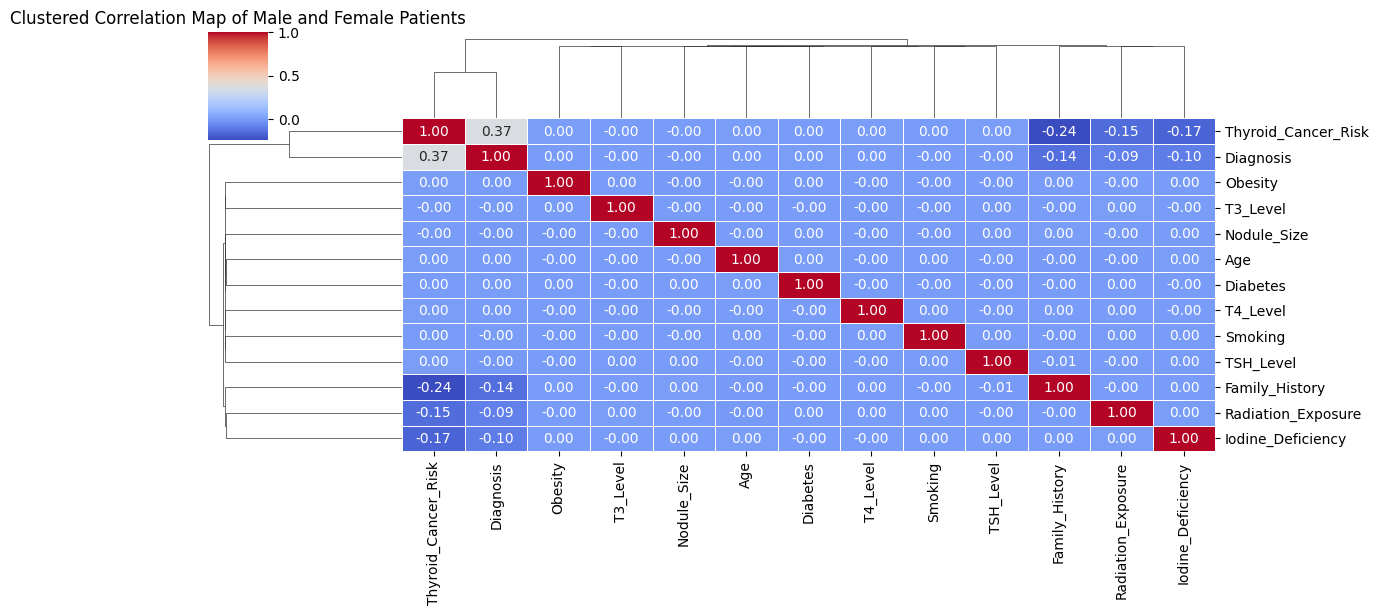

In [168]:
sns.clustermap(numeric_d.corr(), annot=True, cmap="coolwarm", linewidths=0.5, figsize=(12, 6),fmt=".2f")
plt.title("Clustered Correlation Map of Male and Female Patients")
plt.show()

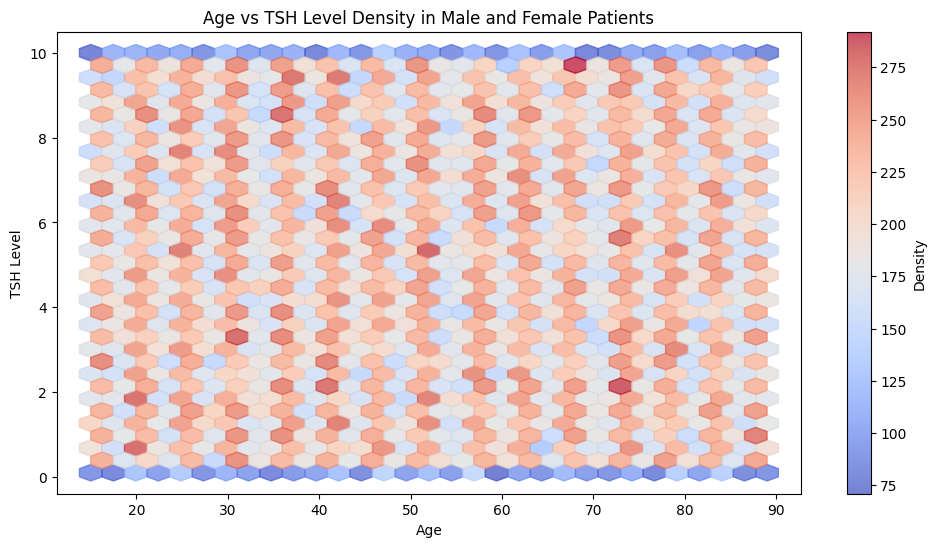

In [169]:
plt.figure(figsize=(12, 6))
plt.hexbin(data["Age"], data["TSH_Level"], gridsize=30, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Density")
plt.title("Age vs TSH Level Density in Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("TSH Level")
plt.show()

In [170]:
data = data.apply(pd.to_numeric, errors = 'coerce')

In [172]:
data = data.drop(columns=["Country", "Gender", "Ethnicity"], errors  ='ignore')

In [173]:
X= data.drop(columns=["Diagnosis"], )
y=data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

In [175]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [178]:
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    elapsed_time = time.time() - start_time
    results.append((name, accuracy, elapsed_time))

In [179]:
results_data = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time (s)"])

In [180]:
results_data = results_data.sort_values(by=["Training Time (s)", "Accuracy"], ascending=[True, False])

In [181]:
results_data

Model  Accuracy  Training Time (s)
5          Naive Bayes  0.813863           0.059899
0  Logistic Regression  0.827373           0.138700
4        Decision Tree  0.704677           1.575002
6              XGBoost  0.826448           2.578156
3             AdaBoost  0.827373           5.212637
2    Gradient Boosting  0.827357          19.128924
1        Random Forest  0.825774          31.992774

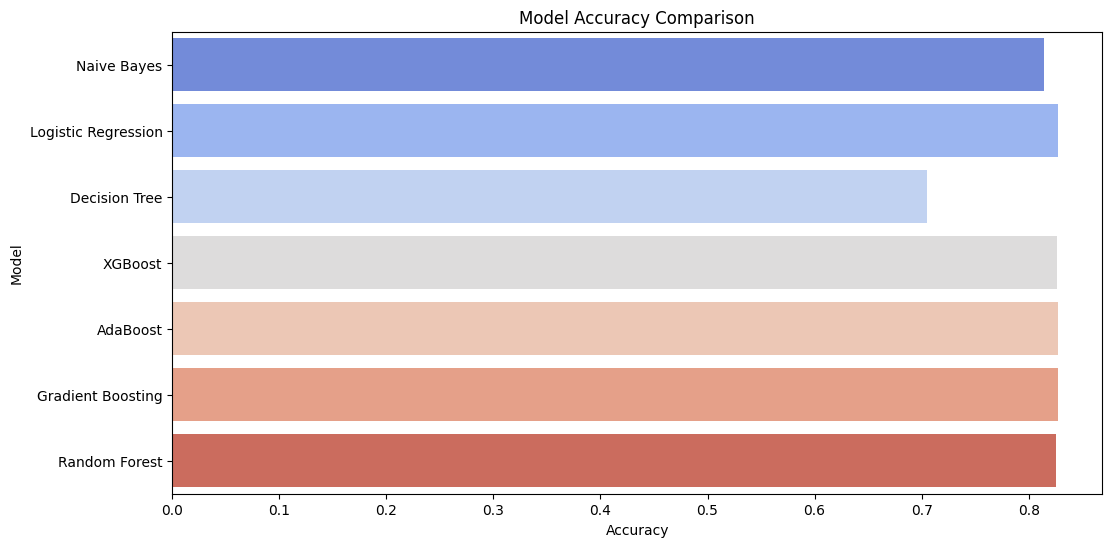

In [182]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_data, x="Accuracy", y="Model", palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

In [183]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ", mae)

r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)

Mean Absolute Error:  0.17355190571715146
R2 Score:  0.02459666968622476


In [185]:
f1 =f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1)

F1 score:  0.8119018103342545


In [186]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']